# Portfolio Management

A portfolio is a collection of financial investments. Let's see how we construct, analyse and optimise portfolios with Python. Like with every notebook, this one starts with a list of imports.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

plt.style.use("ggplot")

## Portfolio Formation

Today we'll form what is known as a 1/N portfolio, with 5 stocks in it. The 1/N refers to the total investment being divided equally among the N stocks that comprise the portfolio - which is 5 in our case today.

Depending on what kind of data we have, portfolio formation can involve different steps.

### Exercise: Pull a Portfolio (Yahoo! Finance)

In this exercise, you'll pull Yahoo Finance data into panel data using yfinance.

Here is an example of how we could join together data from multiple CSV files. Can you adapt this code to instead join together data pulled directly from Yahoo Finance?

```python
tickers = ["TSLA", "MSFT", "AMZN", "META", "NVDA"]
groups = []

for ticker in tickers:
    data = pd.read_csv(ticker + "_2020.csv") # we want year 2020
    df.columns = df.columns.droplevel(1)
    data.insert(0, "Ticker", ticker)
    groups.append(data)

multi_df = pd.concat(data)
multi_df
```

Try it out in the code cell below:

In [38]:
tickers = ["TSLA", "MSFT", "AMZN", "META", "NVDA"]

# Store dataframes here
groups = []

for ticker in tickers:
    
    # Download data from Yahoo Finance
    data = yf.download(ticker, start="2020-01-01", end="2020-12-31")
    data.columns = data.columns.droplevel(1)

    # Add Ticker column
    data.insert(0, "Ticker", ticker)
    
    # Reset index to make Date a column instead of index
    # data.reset_index(inplace=True)
    
    # Append to list
    groups.append(data)

# Concatenate all dataframes vertically
multi_df = pd.concat(groups)
multi_df

/tmp/ipykernel_2081/2766433007.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2020-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_2081/2766433007.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2020-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_2081/2766433007.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2020-12-31")
[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_2081/2766433007.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2020-12-31")
[*********************100%***********************]  1 of 1 comple

Price,Ticker,Close,High,Low,Open,Volume
Date,,,,,,
2020-01-02,TSLA,28.684000,28.713333,28.114000,28.299999,142981500
2020-01-03,TSLA,29.534000,30.266666,29.128000,29.366667,266677500
2020-01-06,TSLA,30.102667,30.104000,29.333332,29.364668,151995000
2020-01-07,TSLA,31.270666,31.441999,30.224001,30.760000,268231500
2020-01-08,TSLA,32.809334,33.232666,31.215334,31.580000,467164500
...,...,...,...,...,...,...
2020-12-23,NVDA,12.974222,13.239257,12.969984,13.220308,179144000
2020-12-24,NVDA,12.958764,13.097141,12.903913,13.002147,97884000
2020-12-28,NVDA,12.865266,13.027329,12.728885,13.027329,212564000


#### Multi-Stock Time Series Data (CRSP)

Maybe instead of Yahoo! Finance, you took advantage of the [College WRDS access](https://www.imperial.ac.uk/admin-services/library/subject-support/business/crsp/), or obtained a CSV with your data in some other way.

Let's work with our panel data as before.

In [39]:
df = pd.read_csv("data/top_six_2020_2025.csv", dayfirst=True)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

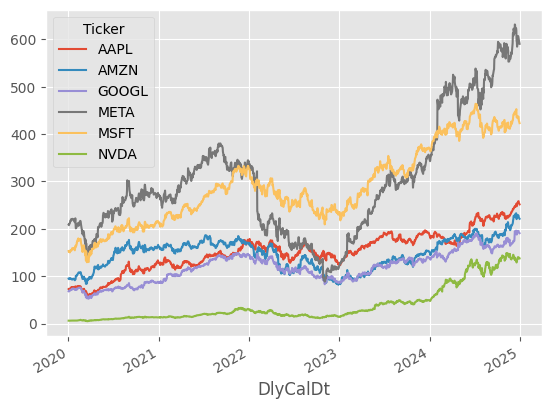

In [46]:
df_pivot = df.pivot(index="DlyCalDt", columns="Ticker", values="DlyClose")
df_pivot.index = pd.to_datetime(df_pivot.index, dayfirst = True)
df_pivot.sort_index(inplace=True) # need to sort as well
df_pivot.plot() # but it is not correct as the dates are not in the right format (now it is)

portfolio = df_pivot.columns[:5]
df_pivot[portfolio]

df_pivot.iloc[:,0:5] # smart indexing
# df = df_pivot.loc[:, ["AMZN", "META", "MSFT", "NVDA"]] # used for leaving specific columns
df

weights = np.ones(6) / 6
weights #equal weighting for 5 portfolios (20% each)

## Calculating Portfolio Daily Returns

First, let's determine the returns of our portfolio. We'll need to start with the daily returns of each stock, and then use `np.dot()` to mutliply each column of returns against its weight in the portfolio.

In [57]:
# Calculate the simple return of each stock in the portfolio
returns = df_pivot.pct_change()
returns = returns.dropna()
returns

# Compute the portfolio returns
p_returns = np.dot(returns, weights)
p_returns

# While we're at it check the daily volatility (standard deviation of portfolio returns)
p_volatility = p_returns.std()
p_volatility

np.float64(0.01996714312629179)

## Annualising Returns and Volatility

To provide a broader picture of our portfolio's performance, let's calculate the annualised portfolio return and volatility. These are important metrics for evaluating and discussing portfolios. They are also used frequently in more advanced financial analyses.

In [65]:
TRADING_DAYS = 252

annualised_return = p_returns.mean() * TRADING_DAYS
annualised_volatility = p_volatility * np.sqrt(TRADING_DAYS)

# print out these metrics nicely

print(
    f"Annualised return:     {annualised_return:.2%}\n"
    f"Annualised volatility: {annualised_volatility:.2%}"
)

Annualised return:     35.49%
Annualised volatility: 31.70%


## Sharpe Ratio

The Sharpe Ratio is a measure that helps investors understand the risk-adjusted return of an investment. A high Sharpe ratio indicates that the portfolio's returns are higher for each unit of risk taken on. In contrast, a lower Sharpe Ratio indicates a less favorable risk-reward trade-off, with the potential for lower returns relative to the amount of risk being assumed.

The Sharpe Ratio is calculated using annualised portfolio returns, portfolio volatility (as the measure of risk), and the *risk-free rate*. The risk-free rate is often derived from the yield of a theoretically risk-free investment, typically a government bond. The Sharpe Ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

### Exercise: Looking Sharpe

Calculate the Sharpe Ratio for our portfolio by applying the formula below.

$$ \text{Sharpe Ratio} = \frac{R_p - R_f}{\sigma_p} $$

- $R_p$ is our annualised portfolio return
- $R_f$ is the risk-free rate
- $\sigma_p$ is our annualised volatility


In [64]:
Rf = 0.0438
sharpe = (annualised_return - Rf)/(annualised_volatility)

print(
    f"""Sharpe ratio is_{sharpe}
    """
)

Sharpe ratio is_0.9814789404729108
    
